In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Data = pd.read_excel("glass.xlsx", sheet_name='glass')
Data
import warnings

warnings.filterwarnings('ignore')


C:\Users\JOSHUAVIJAYA\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
Data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
## There are no null values to be observed

In [5]:
Data.describe().round(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,1.518,13.408,2.685,1.445,72.651,0.497,8.957,0.175,0.057,2.780
std,0.003,0.817,1.442,0.499,0.775,0.652,1.423,0.497,0.097,2.104
min,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000,1.000
25%,1.517,12.908,2.115,1.190,72.280,0.122,8.240,0.000,0.000,1.000
50%,1.518,13.300,3.480,1.360,72.790,0.555,8.600,0.000,0.000,2.000
75%,1.519,13.825,3.600,1.630,73.088,0.610,9.172,0.000,0.100,3.000
max,1.534,17.380,4.490,3.500,75.410,6.210,16.190,3.150,0.510,7.000


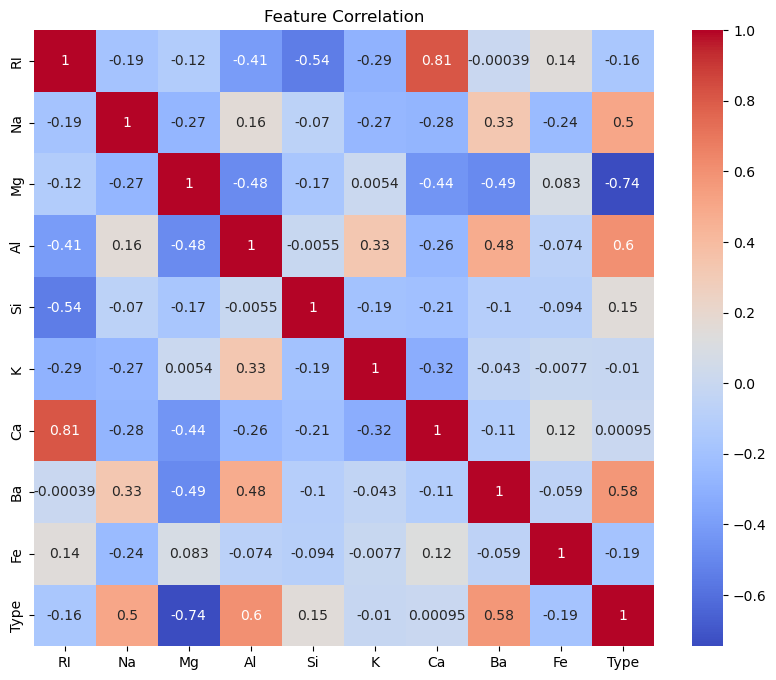

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [7]:
# Refractive index and Ca has highest positive correlation in this graph. Type has positive correlation with Na, Al, Ba 
# And type has highest negative correlation with Mg

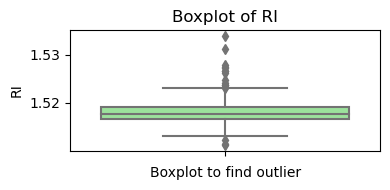

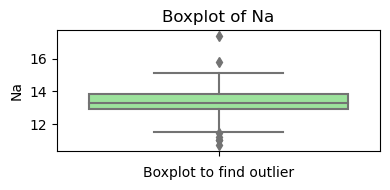

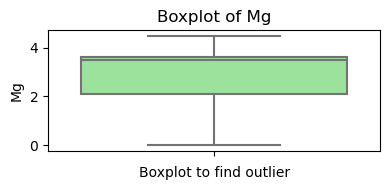

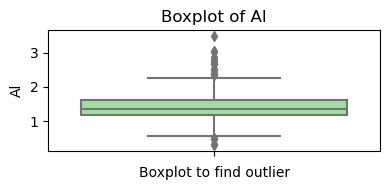

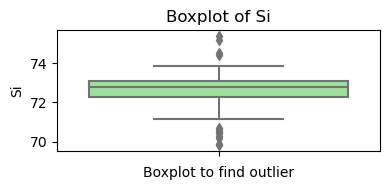

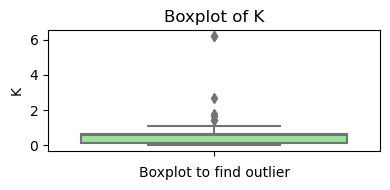

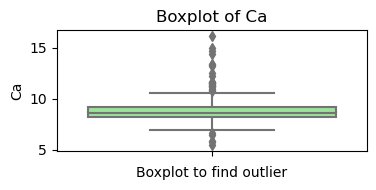

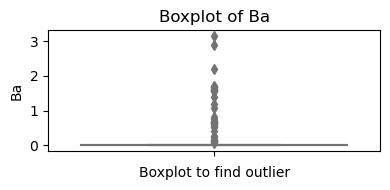

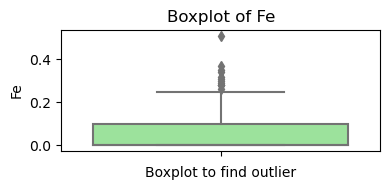

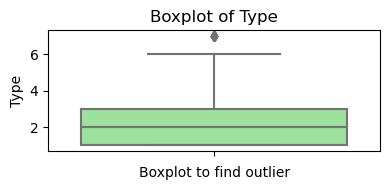

In [8]:
features = Data.columns  
for feature in features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(y=Data[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel("Boxplot to find outlier")
    plt.tight_layout()
    plt.show()

In [9]:
# RI, Na, Al, Si, K, Ca, Ba, Fe, Type has outliers except for Mg 

In [10]:
Data_columns = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'] 

for col in Data_columns:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Data[col] = Data[col].clip(lower, upper)

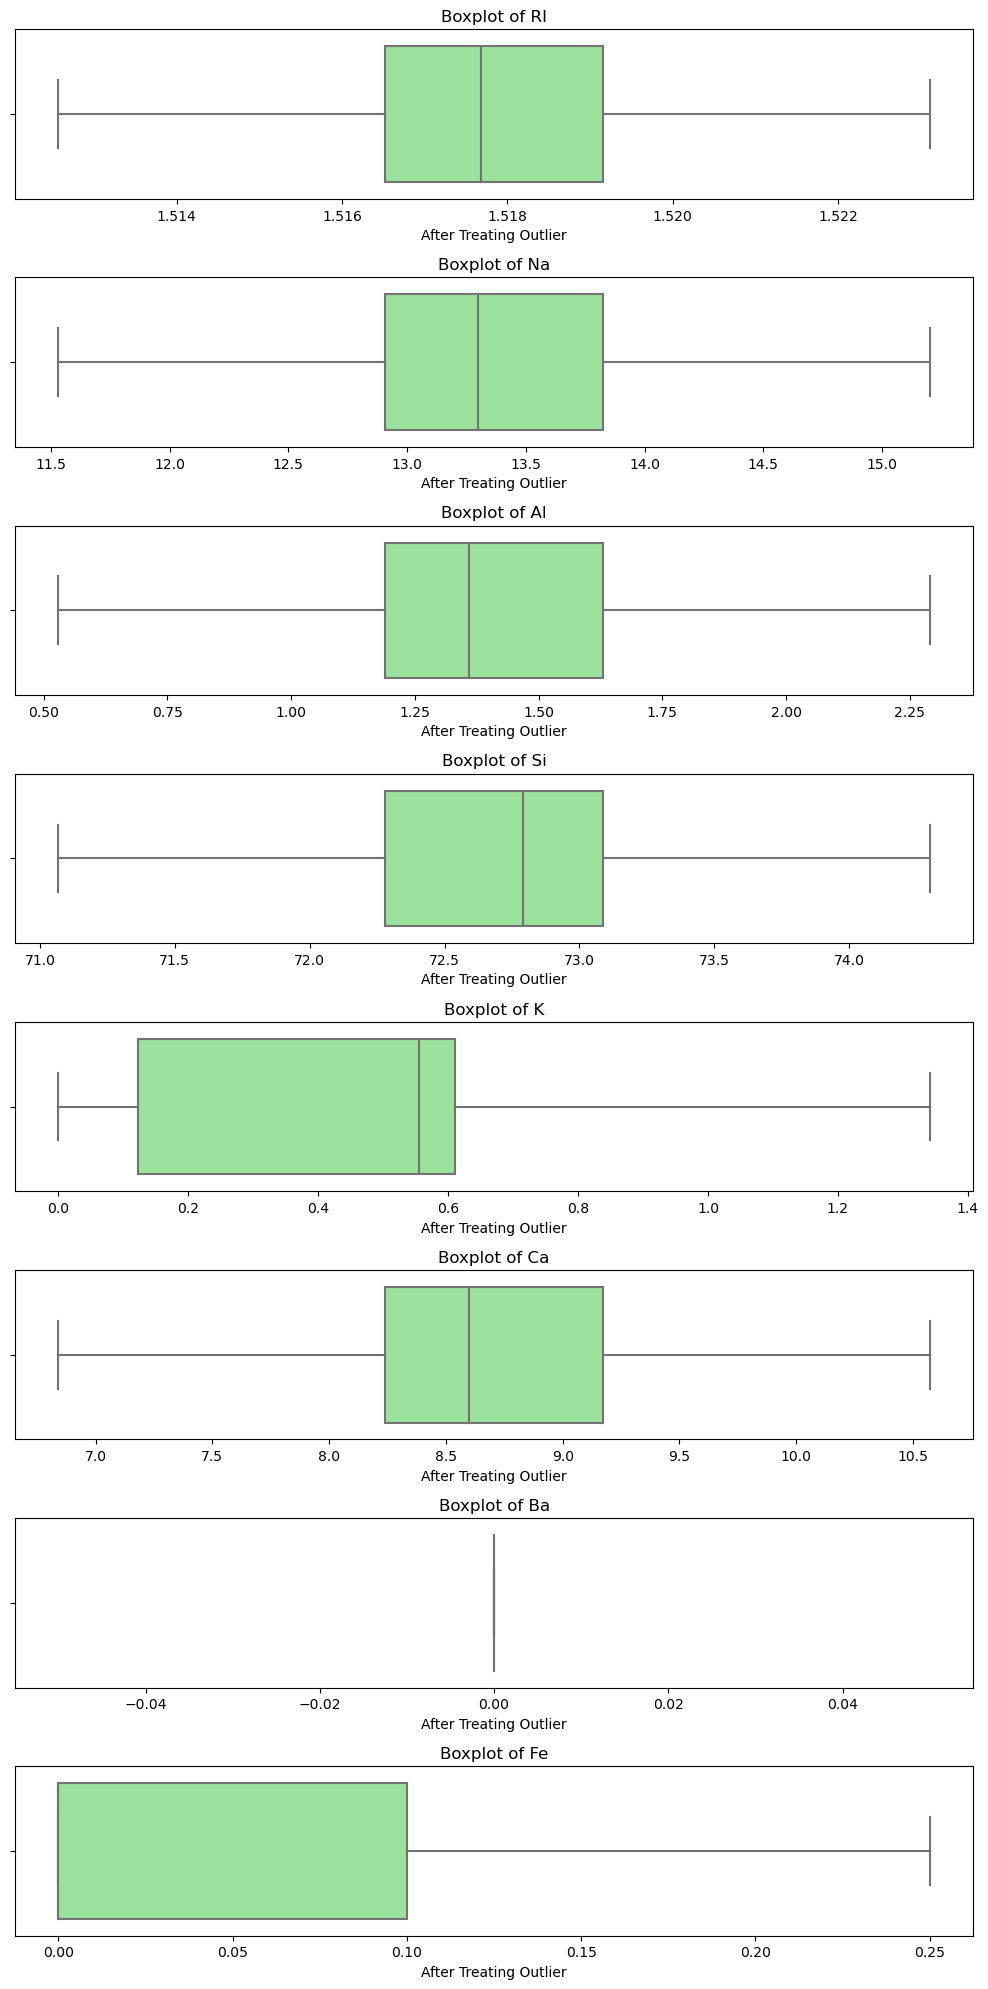

In [11]:
Data_columns = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

plt.figure(figsize=(10, 20))

for i, col in enumerate(Data_columns, 1):
    plt.subplot(len(Data_columns), 1, i)
    sns.boxplot(x=Data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel("After Treating Outlier")

plt.tight_layout()
plt.show()

In [12]:
Data_columns.append('Mg')
Data_columns

['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Mg']

In [13]:
from sklearn.preprocessing import StandardScaler
Data_X = Data[Data_columns]
Data_Y = Data["Type"]               
Data_X
Data_Y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Data_X)
X_scaled

array([[ 1.20149683,  0.31687123, -0.75775845, ...,  0.        ,
        -0.61909102,  1.25463857],
       [-0.23426899,  0.65422823, -0.14360433, ...,  0.        ,
        -0.61909102,  0.63616803],
       [-0.83813521,  0.16843415,  0.28157929, ...,  0.        ,
        -0.61909102,  0.60142249],
       ...,
       [ 1.04947457,  1.28845939,  1.41540227, ...,  0.        ,
        -0.61909102, -1.86551055],
       [-0.69878146,  1.31544795,  1.22643177, ...,  0.        ,
        -0.61909102, -1.86551055],
       [-0.44541102,  1.11303375,  1.55713014, ...,  0.        ,
        -0.61909102, -1.86551055]])

In [14]:
print(Data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


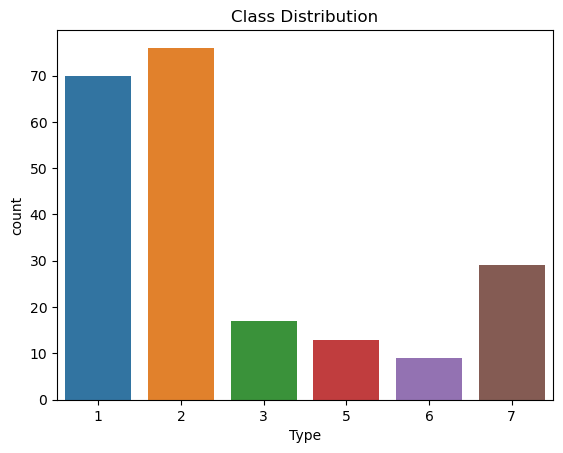

In [15]:
sns.countplot(Data, x='Type')
plt.title("Class Distribution")
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, Data_Y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[14  1  0  0  0  0]
 [ 1 13  0  0  0  1]
 [ 1  0 13  0  1  0]
 [ 0  0  0 15  0  1]
 [ 0  0  0  0 16  0]
 [ 1  0  0  1  1 12]]
              precision    recall  f1-score   support

           1       0.82      0.93      0.88        15
           2       0.93      0.87      0.90        15
           3       1.00      0.87      0.93        15
           5       0.94      0.94      0.94        16
           6       0.89      1.00      0.94        16
           7       0.86      0.80      0.83        15

    accuracy                           0.90        92
   macro avg       0.91      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92

Accuracy: 0.9021739130434783


In [19]:
# the above model has 90 % accuracy which is very good.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.5
              precision    recall  f1-score   support

           1       0.38      0.67      0.49        15
           2       0.14      0.13      0.14        15
           3       0.27      0.20      0.23        15
           5       0.67      0.25      0.36        16
           6       0.84      1.00      0.91        16
           7       0.69      0.73      0.71        15

    accuracy                           0.50        92
   macro avg       0.50      0.50      0.47        92
weighted avg       0.50      0.50      0.48        92



In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8586956521739131
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.80      0.80      0.80        15
           3       0.92      0.80      0.86        15
           5       0.93      0.88      0.90        16
           6       0.84      1.00      0.91        16
           7       0.86      0.80      0.83        15

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



In [22]:
# the gradient has 85 % accuracy but ada has only 50 which pretty low accuracy model.

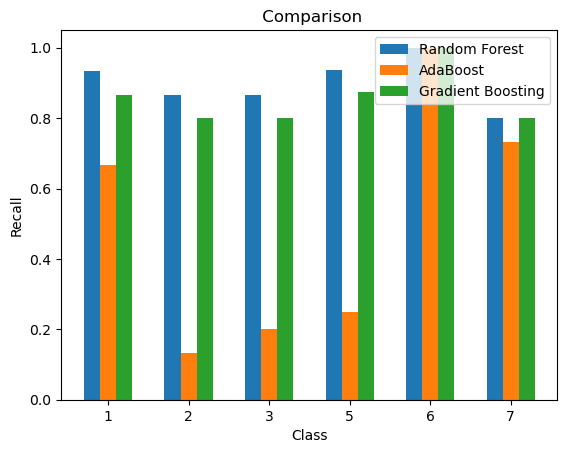

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

classes = ['1', '2', '3', '5', '6', '7']
recall_rf = recall_score(y_test, rf.predict(X_test), average=None)
recall_ada = recall_score(y_test, ada.predict(X_test), average=None)
recall_gb = recall_score(y_test, gb.predict(X_test), average=None)

x = range(len(classes))

plt.bar([i - 0.2 for i in x], recall_rf, width=0.2, label='Random Forest')
plt.bar(x, recall_ada, width=0.2, label='AdaBoost')
plt.bar([i + 0.2 for i in x], recall_gb, width=0.2, label='Gradient Boosting')

plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title(' Comparison')
plt.legend()
plt.show()

In [24]:
# The random forest has higest recall , ada boast has less recall while gradient has is betten than ada boast
# random forest distinguishes the glass type accurately

Bagging- Bagging is an ensemble learning technique that improves the accuracy and stability of machine learning models by training multiple models on different random subsets of the training data (with replacement) and then combining their predictions

Boosting is an ensemble technique that builds a sequence of models, where each model tries to correct the errors made by the previous one.